## **PERSONAL LOAN CAPMAGIN**
**Content**:
* Problem Statment & Objective
* Data Dictionary
* References
* Program
  * Packages Importing & Google Drive Mounting
  * Python Class: for Load Data, Data Pre-check & Data Visualization
  * Python Class: Scikit-Learn Decision Tree Modelling
  * Invoking Function: Scikit-Learning Decision Tree Modeling
  * Metrics Comparison Complete Tree, Pre-Pruning & Post-Pruning

________________________________________________________________________________________________________________________________________________________________
***Problem Statement***:
A US Bank(All Life Bank) is doing the Loan campagin to increase their liablity customer to borrow personal Loan also to retain them with their liablity account. In their last financial year campagain they acheived the coversion @9%
This encouraged them to increase their target advertisment campagin to increase their loan account
________________________________________________________________________________
***Objective***: As a data analyst to perform classification alorithm to predict & recommend the suggestion to leverage future growth on the loan account holdings by using below classification alogrithm
* Decision Tree Alogrithm(Scikit learn Packages)
* Logistic Alogrithm(Scikit learn & Tensorflow)
* Cluster Alogrithm(Scikit learn & Tensorflow)
________________________________________________________________________________

**DATA DICTIONARY**
* ID: ID of the Customer
* Age: Custmer completed aged
* Experience: Custmer work experience
* Income: Annual Income of the customer in thousand dollar
* ZIP Code: Customer Residence ZIP Code
* Family: Family size of the customer
* CCAvg: Customer Average spending on credit cards per month in thousand dollar
* Education: Education level of the customer. 1-Under graduate, 2-Graduate, 3- Advance or professional
* Mortgage: Mortgage value of the house in thousand dollar
* Securities Account: denoted that the customer have the securities account
* CD_Account: denotes that whether the customer have certificate of deposit account with the bank
* Online: Does the custmer using online banking
* Credit card: Does the customer use credit card issued by another bank
* Personal_Loan: Did the customer accepted the personal loan or not in previous campgain

________________________________________________________________________________

***REFERNCES***
1. Great Learning Video & Reference material for the Machine learning Alorithm by Professor. Kumar Muthuram Faculty McCombs school of Business, UT Austin & Professor. Abinanda Sarkar Sr. Faculty Data Science.
Link: https://olympus.mygreatlearning.com/courses/121701?th=co&pb_id=18194


2. Scikit Learn Decision Tree: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html

3. Scikit learn RandomizedsearchCV: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

4. Scikitlearn GridsearchCV: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

5. Scikit Learn Logistic Algorithm: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

6. Tensorflow Logistic Regression Alogrithm: https://www.tensorflow.org/guide/core/logistic_regression_core

7. Scikit learn Clustering alogrithm: https://scikit-learn.org/1.5/modules/clustering.html

8. Tensorflow: Clustering algorithm: https://www.tensorflow.org/federated/api_docs/python/tff/learning/algorithms/build_fed_kmeans?form=MG0AV3






### PACKAGES IMPORTING & MOUNTING GOOGLE DRIVE

In [32]:
'''
Importing packages needed for the project
pandas- Data analysis and computing
numpy-scientific computation
matlpotlib & seaborn- data visualization
tensorflow- deep learning algorithm
sklearn - for Decision tree MAchine learning algorithm
'''
!pip install scikeras
!pip install keras-tuner
!pip install scikit-learn==0.24.2
!pip install --upgrade scikeras
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #Data analysis and computing
import numpy as np # Scientific Computation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import tensorflow as tf # Deep learning Alogrithm
from tensorflow.keras.metrics import Accuracy, Precision, Recall,F1Score # Deep learning Alogrithm
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping # to stop the Epoch once condition acheived
import traceback # exception traceback

from sklearn.model_selection import train_test_split # To split the dataset into train and test data
from sklearn.preprocessing import StandardScaler # To standardize the data
from sklearn.model_selection import GridSearchCV # Hyperprameter tuning cross validation
from sklearn.model_selection import RandomizedSearchCV #Hyperparameter tuning
from sklearn.model_selection import cross_val_score # Cross validation
from sklearn.tree import DecisionTreeClassifier # Decision Tree Alogrithm
from sklearn import tree # Decision tree
from sklearn.metrics import (confusion_matrix,recall_score,f1_score,accuracy_score,precision_score,classification_report,roc_auc_score,roc_curve) #Metrics calculation
from scipy.stats import randint #random int generation
from sklearn.linear_model import LogisticRegression ## Logistic Regression model
import statsmodels.stats.api as sms ##Stats model package for logistic regression
import statsmodels.api as sm ##Stats model package for logistic regression
from statsmodels.stats.outliers_influence import variance_inflation_factor ##Stats model package for logistic regression
from statsmodels.tools.tools import add_constant ##Stats model package for logistic regression
from sklearn.calibration import CalibratedClassifierCV #To Calibrate the classifier algorithm
from sklearn.utils.class_weight import compute_class_weight #To compute the class weight
from imblearn.over_sampling import SMOTE # To resample the scalled dataset
from scikeras.wrappers import KerasClassifier # Keras wrapper for classifier algorithm






'''
  Mounted my Google Drive to fetch the dataset Loan_Modelliing.csv
'''
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/'
!ls

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive
 Archives	    Loan_Modelling.csv	        Others
'Colab Notebooks'   LoanModellingProject.html   PGP_AI_ML_GREAT_LEARNING


## Python Class Load Data, Precheck & Data Visualization



In [2]:
'''
This class load the dataset into the panda dataframe
also this class perform the dataset overview
'''

class Loan_Modelling:
  ## Constructor function
  def __init__(self):
    print('Constructor')

  # To Load the dataset
  def Load_DataSet(self,file_name):
    return pd.read_csv(file_name)

  def DataSet_OverView(self,df):
    try:
      print('*'*100)
      print('Dataset OverView')
      print('Number of Rows in the Dataset: ', df.shape[0])
      print('Number of columns in Dataset: ', df.shape[1])

      print('-'*100)
      print('Data set Information')
      # To get the dataframe datatype information
      df_info = df.info()

      print(df_info)

      print('-'*100)
      print('Dataset Statistical summary')
      #To get the dataframe stats
      df_describe = df.describe(include='all')

      print(df_describe)

      print('-'*100)
      print('Top 5 rows from the dataset')
      # To print the top 5 rows in dataframe
      print(df.head(5))

      print('-'*100)

      print('-'*100)
      print('Last 5 rows from the dataset')
      # To print the last 5 rows in dataframe
      print(df.tail(5))

      print('-'*100)

    except Exception as ex:
      print('Exception Occured: ', ex)
      traceback.print_exc()

In [3]:
'''
To do the null check and duplicate check in the dataframe
'''

class Dataset_Precheck:
  def __init__(self):
    print('EDA_LoadModelling class Constructor')

  # To check the null values in the dataframe
  def Check_The_NullValues(self,df):

    nullval = df.isnull().sum()

    print('-'*100)
    print('Checking the Null Values in the dataset')
    print(nullval)

    if nullval.sum() == 0:
      print('No Null values present in the dataset')
    else:
      print('Null Values present in the dataset')
    print('-'*100)

  # To check the duplicate rows in the dataframe
  def Check_The_Duplicated_Rows(self,df):
    print('-'*100)
    print('checking for the duplicate rows present in the dataset or not')

    duplicate_row_count = df[df.duplicated()]

    if(duplicate_row_count.shape[0] == 0):
      print('NO Duplicate rows present in the Dataset')
    else:
      print('Duplicate rows are present in the Dataset')
      print('Number of the duplicate rows present in the dataset: ',duplicate_row_count.shape[0])

    print('-'*100)

In [4]:
'''
Dataset Visualization
Univariate and Multivariate Analysis
'''
class Dataset_Visualization:
  def __init__(self,df):
    print('Data set visualization')
    self.df = df
    #self.column_names = df.select_dtypes(include=['int64','float64']).columns
    self.column_names = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']
    self.cross_tab_col =['Education','Family','Securities_Account','CD_Account','Online','CreditCard']
    self.target_column=['Personal_Loan']
    self.heatmap_column =['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']

  # To print the univariate and multivariate analysis
  def Print_The_Plot(self):
    self.univariate_HistPlot()
    self.BoxPlotAnalysis()
    self.multivariate_countplot()
    self.multivariate_HeatMap()
    self.crosstab_plot()
    self.univariate_kdeploat()
    self.mulitvariate_pairplot()

  # Histplot for the numeric column
  def univariate_HistPlot(self):
    print('univariate Analysis')

    plt.figure(figsize=(15,10))
    for indx,col_plt in enumerate(self.column_names):
      plt.subplot(5,3,indx+1)
      sns.histplot(data = self.df, x=col_plt,kde=True,color='green')

    plt.tight_layout()
    plt.show()

  # Box plot analysis
  def BoxPlotAnalysis(self):
    plt.figure(figsize=(15,10))
    for indx,col_plt in enumerate(self.column_names):
      plt.subplot(4,3,indx+1)
      sns.boxplot(data = self.df, x='Personal_Loan',y=col_plt,color= 'lightblue')

    plt.tight_layout()
    plt.show()

  #cross tab plot
  def crosstab_plot(self):
    plt.figure(figsize=(15,10))
    for indx,col_plt in enumerate(self.cross_tab_col):
      plt.subplot(len(self.cross_tab_col)//3+1,3,indx+1)
      #plt.subplot(6,1,indx+1)
      tab=pd.crosstab(self.df[col_plt],self.df['Personal_Loan'],normalize='index').sort_values(by=0,ascending=False)
      tab.plot(kind='bar',stacked=True,ax=plt.gca())
      plt.xlabel(col_plt)
      plt.ylabel('Percentage')

      plt.legend(labels=['No','Yes'])
    plt.tight_layout
    plt.show()

  def univariate_kdeploat(self):
    plt.figure(figsize=(15,10))
    for indx, col_plt in enumerate(self.column_names):
      plt.subplot(5,3,indx+1)
      sns.kdeplot(data = self.df, x=col_plt,color='red')

    plt.tight_layout()
    plt.show()

  def mulitvariate_pairplot(self):
    plt.figure(figsize=(15,10))
    sns.pairplot(self.df, hue ='Personal_Loan', palette ='bright')
    plt.show()

  def multivariate_HeatMap(self):
    plt.figure(figsize=(10,7))
    sns.heatmap(self.df[self.heatmap_column].corr(numeric_only=True),annot=True,cmap='Spectral',fmt='.2f')
    plt.show()

  def multivariate_countplot(self):
    plt.figure(figsize=(5,5))
    sns.countplot(data=self.df, x='Personal_Loan',color='green')








## TEST TRAIN SPLIT, SCALAR TRANSFORM & SMOTE RESAMPLING

In [5]:
'''
To Split the dataset into Test and train for the attribute and feature
scalar transformation
SMOTE resampling to balance the dataset

'''

class DatSetSplit_And_MetricsCalculation:
  def __init__(self,df):
    self.df = df

  def Split_Train_Test(self):
    df_Features = self.df.drop(['ID','Personal_Loan'],axis=1)
    df_Target = self.df['Personal_Loan']
    print('-'*100)
    print('Feature Dataset Distribution')
    print('Rows: ',df_Features.shape[0],'columns: ',df_Features.shape[1])
    print('Target Dataset Distribution')
    print('Rows: ',df_Target.shape[0])
    print('-'*100)

    # Split the dataset into Test and Train
    Attribute_Train,Attribute_Test,Target_Train,Target_Test = train_test_split(df_Features,df_Target,test_size=0.2,random_state=42,stratify=df_Target)
    print('-'*100)

    print('Feature Test data count: ',Attribute_Test.shape[0],'rows and ',Attribute_Test.shape[1],'columns')
    print('Feature Train data count: ',Attribute_Train.shape[0],'rows and ',Attribute_Train.shape[1],'columns')
    print('Target Test data count: ',Target_Test.shape[0],'rows')
    print('Target Train data count: ',Target_Train.shape[0],'rows')
    print('-'*100)
    return Attribute_Train,Attribute_Test,Target_Train,Target_Test

  # Scalar transformation dataset
  def Scaler_Transform(self, Attribute_Train,Attribute_Test):
    scaler =StandardScaler()
    Attribute_Test_Scaled = scaler.fit_transform(Attribute_Test)
    Attribute_Train_Scaled = scaler.fit_transform(Attribute_Train)
    print('-'*100)
    print('Attribute Test Scaler shape: ',Attribute_Test_Scaled.shape)
    print('Attribute Train Scaler shape: ',Attribute_Train_Scaled.shape)
    print('-'*100)

    return Attribute_Train_Scaled, Attribute_Test_Scaled

  # Resample the dataset to balance the dataset by using SMOTE
  def SMOTE_Resample(self,Attribute_Train_scaled,Target_Trained):
    print('-'*100)
    print('SMOTE Resample')
    smote_model = SMOTE(random_state=42)
    Attribute_Train_resample,Target_Train_resample = smote_model.fit_resample(Attribute_Train_scaled,Target_Trained)

    print('-'*100)
    print('Attribute resample shape: ',Attribute_Train_resample.shape)
    print('Target resample shape: ',Target_Train_resample.shape)

    return Attribute_Train_resample,Target_Train_resample

  # TO calculate the metrics
  def Calculating_Metrics(self, Target, Predicted_Target,sampleType,Algorithm,Package_type):
    print('-'*100)
    print('Calculating The Metrics')
    Target_Accuracy = accuracy_score(Target,Predicted_Target)
    Target_Precision = precision_score(Target,Predicted_Target)
    Target_Recall = recall_score(Target, Predicted_Target)
    Target_F1Score =f1_score(Target, Predicted_Target)
    Target_Confusion = confusion_matrix(Target, Predicted_Target)
    Target_Class = classification_report(Target,Predicted_Target)
    print(Target_Class)

    df_Metrics = pd.DataFrame({'Algorithm':[Algorithm],'Package Type':[Package_type],'Sample Type':[sampleType],'Accuracy':[Target_Accuracy],
                               'Precision':[Target_Precision],'Recall':[Target_Recall],'F1-Score':[Target_F1Score]})

    confusion_label = np.asarray([["{0:0.0f}".format(item)+"\n{0:.2}".format(item/Target_Confusion.flatten().sum())]
                                for item in Target_Confusion.flatten()]).reshape(2,2)

    plt.figure(figsize=(2,2))
    sns.heatmap(Target_Confusion,annot=confusion_label,cmap='Spectral',fmt='')
    plt.ylabel('Acutal')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix '+sampleType)
    plt.show()

    return df_Metrics



## Basic Python class function invoking

In [6]:
#create object and invoke the class
objloan = Loan_Modelling()
## Load Dataset
df_LoanModelling = objloan.Load_DataSet('Loan_Modelling.csv')

## DATA SET OVERVIEW
objloan.DataSet_OverView(df_LoanModelling)



Constructor
****************************************************************************************************
Dataset OverView
Number of Rows in the Dataset:  5000
Number of columns in Dataset:  14
----------------------------------------------------------------------------------------------------
Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 n

In [7]:
# Invoke the class for the Dataset pre check
objEDA = Dataset_Precheck()
objEDA.Check_The_NullValues(df_LoanModelling)

objEDA.Check_The_Duplicated_Rows(df_LoanModelling)

EDA_LoadModelling class Constructor
----------------------------------------------------------------------------------------------------
Checking the Null Values in the dataset
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
No Null values present in the dataset
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
checking for the duplicate rows present in the dataset or not
NO Duplicate rows present in the Dataset
----------------------------------------------------------------------------------------------------


In [8]:
# Visualization
obj_dataVisual = Dataset_Visualization(df_LoanModelling)


Data set visualization


univariate Analysis


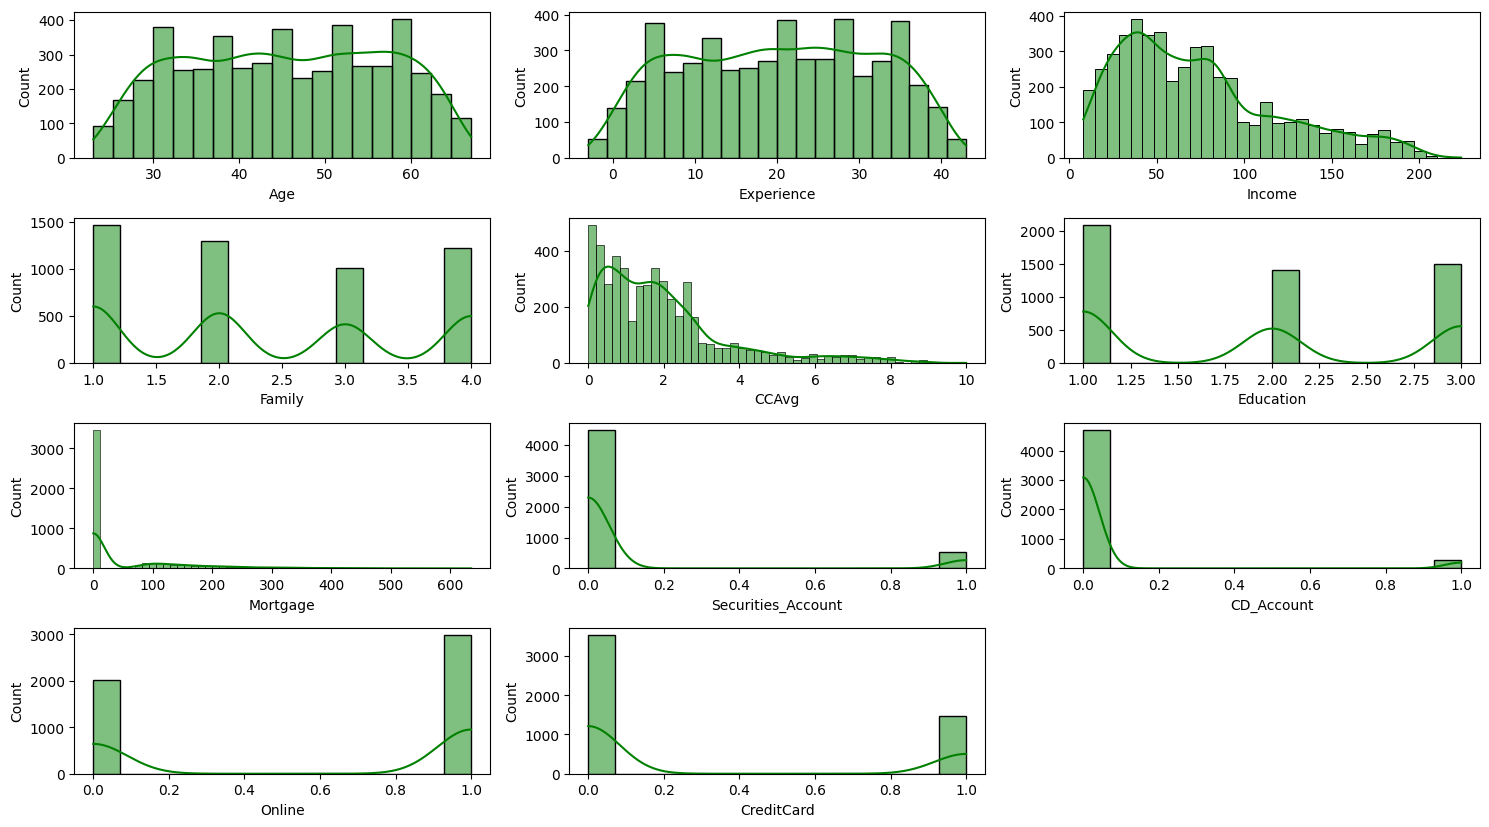

'\nAge & Experience: Smooth distribution across ages\nIncome & CCAvg:Left Skewed\n\n\n'

In [9]:
obj_dataVisual.univariate_HistPlot()

'''
Age & Experience: Smooth distribution across ages
Income & CCAvg:Left Skewed


'''

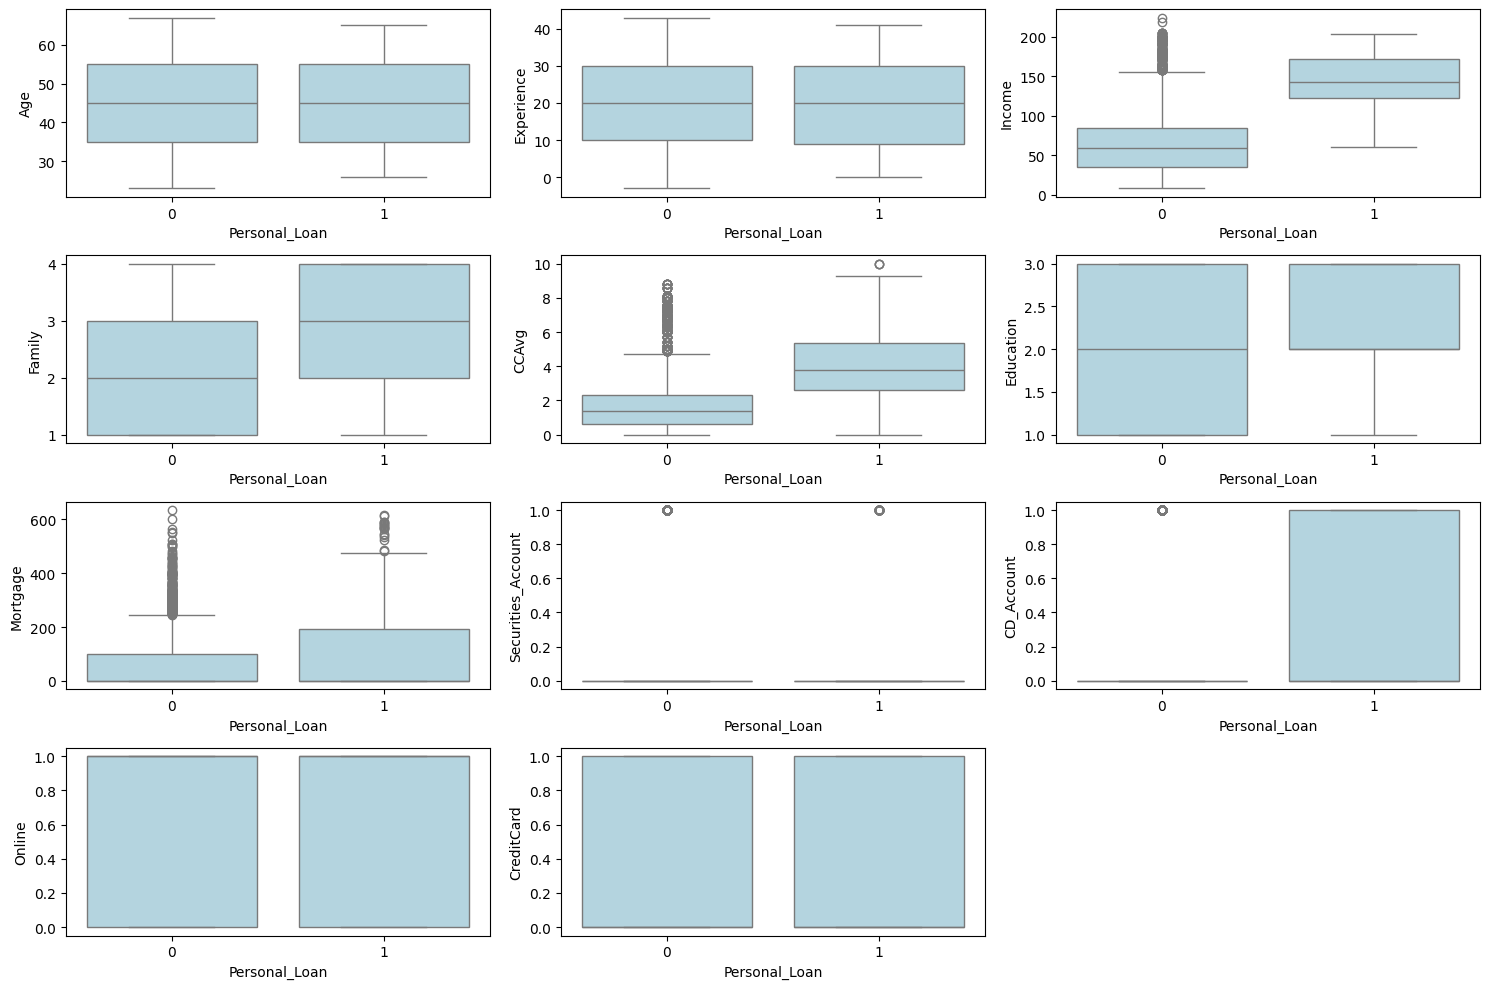

'\nObservation\n1. Income is high who taken the load\n2. Outliers in the CCAvg , Outliers\n'

In [10]:
obj_dataVisual.BoxPlotAnalysis()
'''
Observation
1. Income is high who taken the load
2. Outliers in the CCAvg , Outliers
'''

'\nThis showing more that 4000+ custmer not taken the loan\n400+ Customers taken loan\n'

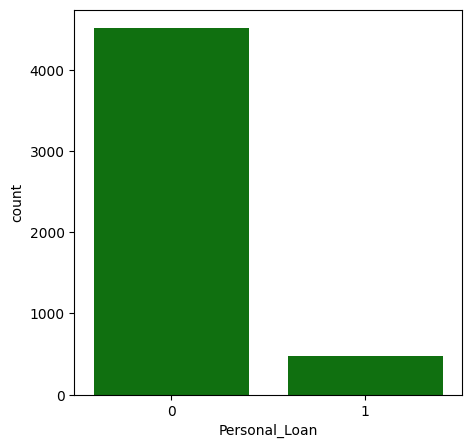

In [11]:
obj_dataVisual.multivariate_countplot()
'''
This showing more that 4000+ custmer not taken the loan
400+ Customers taken loan
'''


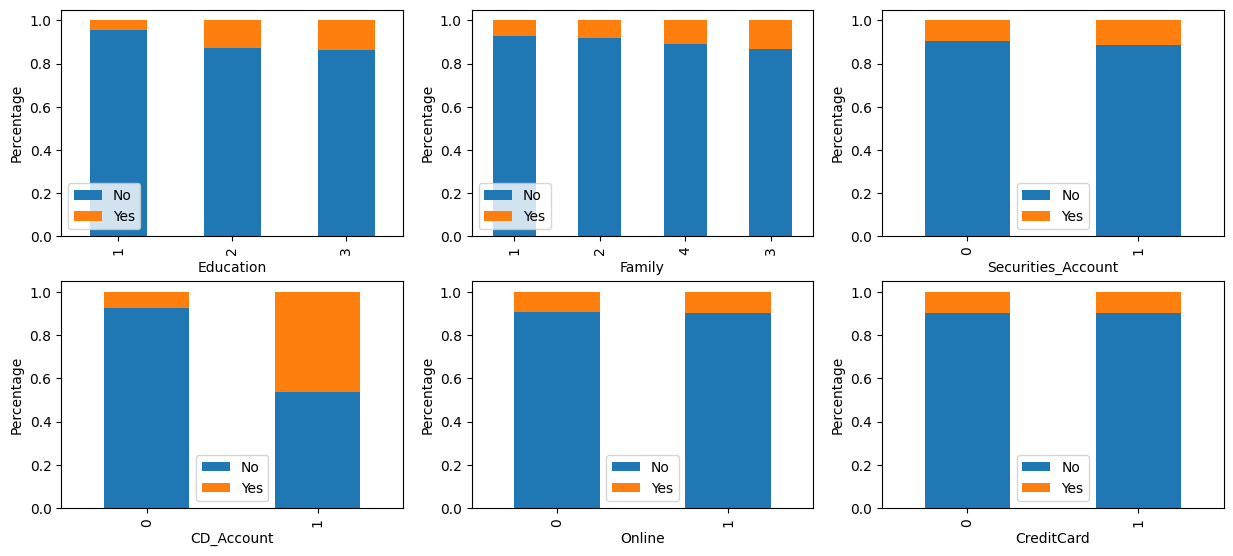

'\nBelow Graph shown that distribution of the personal loan taken or not for the below attribute\nthe customer with certificate of deposit account holders taken loan comparative to other attributes\n'

In [12]:
obj_dataVisual.crosstab_plot()
'''
Below Graph shown that distribution of the personal loan taken or not for the below attribute
the customer with certificate of deposit account holders taken loan comparative to other attributes
'''

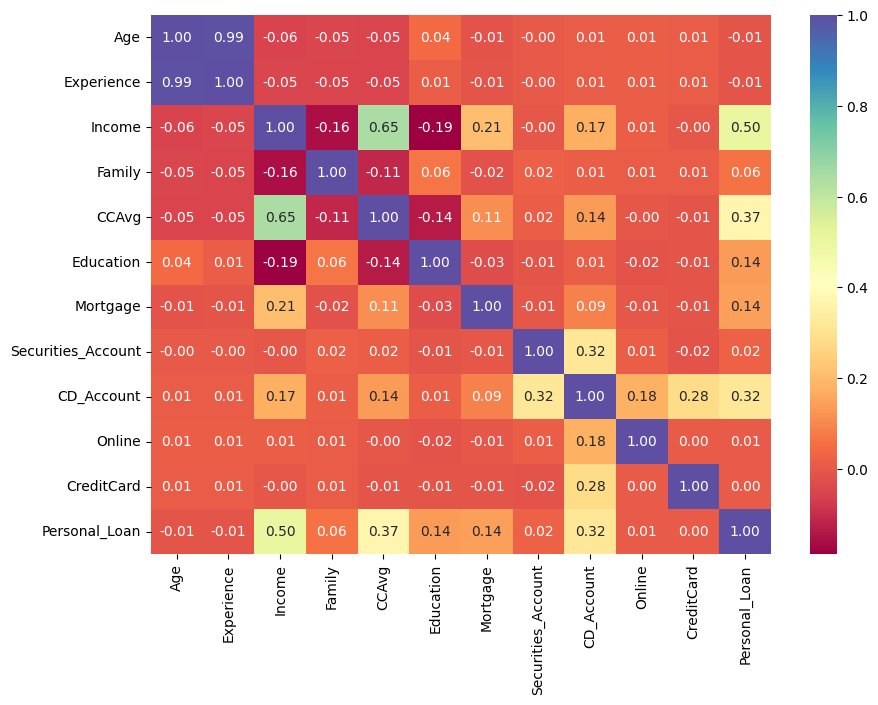

'\nIncome, CD_Account, CCAverage Highly coralated with Personal loan taken\n\n'

In [13]:
obj_dataVisual.multivariate_HeatMap()

'''
Income, CD_Account, CCAverage Highly coralated with Personal loan taken

'''

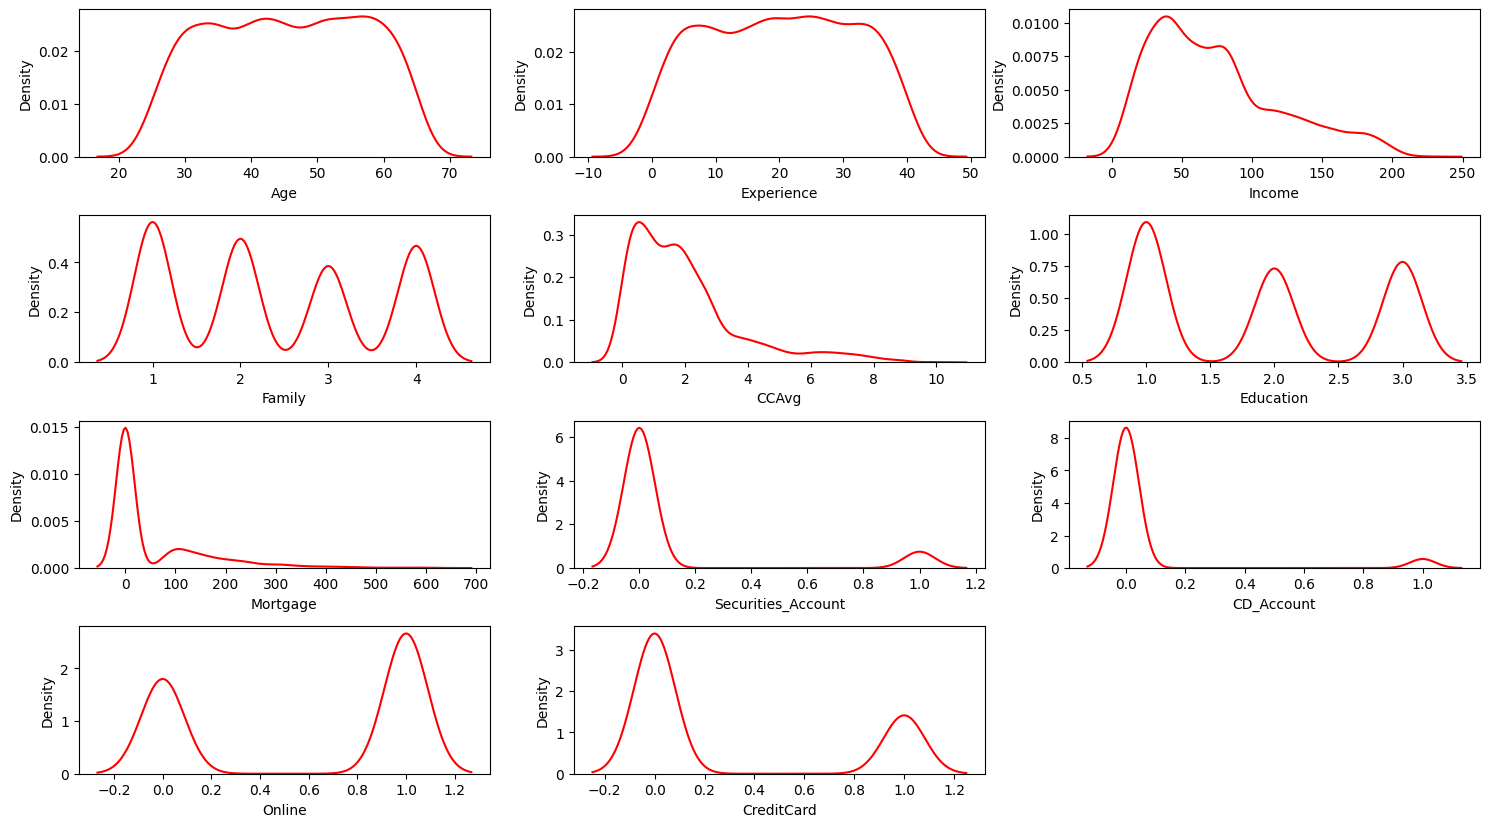

In [14]:
obj_dataVisual.univariate_kdeploat()

In [15]:
obj_dataVisual.mulitvariate_pairplot()

Output hidden; open in https://colab.research.google.com to view.

## Python Class: Scikit Learnin Decision Tree

In [16]:
'''
Scikit learn Decision Tree
Program description:
  1. Split the dataset into train and test
  2. scalar transformation to flatten the dataset
  3. SMOTE resampling to balance the dataset
  4. Complete run Decision tree classifier
  5. compute the metrics(proablity basis) to get the good coverage
  6. Pre Prun using Grid search CV and Randomized search cv
  7. compute the metrics(proablity basis) to get the good coverage
  8. Post pruning finding best score ccp_alpha value and fit the model
  9. compute the metrics(proablity basis) to get the good coverage
'''

class SclitLearn_DecisionTree_Model:
  def __init__(self,df):
    print('constructor sclit learn model')
    self.df = df
    self.Feature_Test= pd.DataFrame()
    self.Feature_Train=pd.DataFrame()
    self.Target_Test=pd.DataFrame()
    self.Target_Train = pd.DataFrame()

  '''
   SPLIT THE DATASET
  '''
  def Split_Train_Test(self):
    df_Target = self.df['Personal_Loan']
    df_Features = self.df.drop(['ID','Personal_Loan'],axis =1)

    self.Feature_Test,self.Feature_Train,self.Target_Test,self.Target_Train = train_test_split(df_Features,df_Target,test_size=0.2,random_state=42,stratify=df_Target)

    print('-'*100)
    print('Feature Test data count: ',self.Feature_Test.shape[0],'rows and ',self.Feature_Test.shape[1],'columns')
    print('Feature Train data count: ',self.Feature_Train.shape[0],'rows and ',self.Feature_Train.shape[1],'columns')
    print('Target Test data count: ',self.Target_Test.shape[0],'rows')
    print('Target Train data count: ',self.Target_Train.shape[0],'rows')
    print('-'*100)

    print('Target Test Value distribution')
    print(100*self.Target_Test.value_counts(normalize=True), '\n')
    print('Target Train Value distribution')
    print(100*self.Target_Train.value_counts(normalize=True), '\n')

    print('-'*100)


  '''
  COMPLETE TREE MODEL EXEUCTION
  '''
  def Default_Tree_Model(self):
    print('Default Tree Model')

    def_tree = DecisionTreeClassifier(random_state=42)
    def_tree.fit(self.Feature_Train,self.Target_Train)
    return def_tree
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
  def Tree_GridSearchCV(self):
    print('Tree GridSearchCV')
    max_depth = [None,2,4,6,8,10]
    min_samples_split = [10,20,30,40]
    min_sample_leaf = [5,10,15,20]
    max_features = [None,'sqrt','log2']
    max_leaf_nodes = [None, 5, 10,15,20]
    criterion =['gini','entropy']
    param_grid = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_sample_leaf,'max_features':max_features,
                  'max_leaf_nodes':max_leaf_nodes,'criterion':criterion}

    dec_tree = DecisionTreeClassifier(random_state = 42)
    grid_search = GridSearchCV(estimator = dec_tree, param_grid = param_grid,cv=5)
    return grid_search.fit(self.Feature_Train,self.Target_Train)
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#

  '''
  PRE PRUNE TUNING THE MODEL USING RANDOMIZED SEARCH CV
  '''
  def Tree_RandomizedSearchCV(self):
    print('Tree Randomized Search CV')
    max_depth = [None,10,20,30,40,50]
    min_samples_split = randint(2,30)
    min_sample_leaf = randint(1,20)
    max_features = [None,'sqrt','log2']
    max_leaf_nodes = [None,10,20,30,40,50]
    criterion =['gini','entropy']
    param_dist = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_sample_leaf,'max_features':max_features,
                  'max_leaf_nodes':max_leaf_nodes,'criterion':criterion}

    dec_tree = DecisionTreeClassifier(random_state = 42)
    random_search = RandomizedSearchCV(estimator = dec_tree, param_distributions = param_dist,cv=5,n_iter=100)
    return random_search.fit(self.Feature_Train,self.Target_Train)
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#

  '''
  POST PRUNING THE TREE
  '''
  def Tree_Post_Pruning(self):
    print('Tree cost post pruning')

    ##FULL TREE MODEL
    Full_Tree = DecisionTreeClassifier(random_state=42)
    Full_Tree.fit(self.Feature_Train,self.Target_Train)


    # PRUNING PATH COMPUTATION
    post_prunning_path = Full_Tree.cost_complexity_pruning_path(self.Feature_Train,self.Target_Train)
    ccp_alpha,impurities = post_prunning_path.ccp_alphas , post_prunning_path.impurities
    print('ccp_alpha value for full trained tree: ',ccp_alpha)
    print('impurities value for full trained tree: ',impurities)

    ## FOR EACH ALPHA VALUE PRUNNING THE TREE AND STORING ACCURACY
    tree_prune =[]
    for ccp_al in ccp_alpha:
      tree_prune_alpha = DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_al)
      tree_prune_alpha.fit(self.Feature_Train,self.Target_Train)
      tree_prune.append(tree_prune_alpha)

    ## Evaluate the pruned based on alpha accuracy
    train_score_alpha_prune = [accuracy_score(self.Target_Train, tree_indx.predict(self.Feature_Train)) for tree_indx in tree_prune]
    test_score_alpha_prune = [accuracy_score(self.Target_Test, tree_indx.predict(self.Feature_Test)) for tree_indx in tree_prune]

    ## BASED ON THE TEST ACCURACY FINDING THE BEST TREE
    max_score_index = np.argmax(test_score_alpha_prune)
    best_fit_ccp_alpha = ccp_alpha[max_score_index]

    ## TRAIN THE TREE FOR BEST FIT CCP ALPHA
    best_fit_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_fit_ccp_alpha)
    best_fit_tree.fit(self.Feature_Train,self.Target_Train)

    return best_fit_tree



#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
  '''
  METRICS CALCULATION
  '''

  def Metrics_Calculation(self,treeModel,algorithm_type,package_type,):
    print('Metrics Calculation')
    outcome_Prediction_Test = treeModel.predict(self.Feature_Test)
    df_outcome_Pred_Test = pd.DataFrame({'Actual':self.Target_Test, 'Predicated_Ourcomes':outcome_Prediction_Test})

    Test_accuracy = accuracy_score(self.Target_Test,outcome_Prediction_Test)
    Test_recall = recall_score(self.Target_Test,outcome_Prediction_Test)
    Test_Precision = precision_score(self.Target_Test,outcome_Prediction_Test)
    Test_f1_score = f1_score(self.Target_Test,outcome_Prediction_Test)
    Test_confusion_matrix = confusion_matrix(self.Target_Test,outcome_Prediction_Test)
    df_Test_Metrics = pd.DataFrame({'Algorithm':[algorithm_type],'Package Type':[package_type],'Sample Type':['Test_dataset'],'Accuracy':[Test_accuracy],
                                    'Recall':[Test_recall], 'Precision':[Test_Precision], 'F1-Score':[Test_f1_score]})

    print('-'*100)
    outcome_Prediction_Train = treeModel.predict(self.Feature_Train)

    Train_accuracy = accuracy_score(self.Target_Train,outcome_Prediction_Train)
    Train_recall = recall_score(self.Target_Train, outcome_Prediction_Train)
    Train_Precision = precision_score(self.Target_Train, outcome_Prediction_Train)
    Train_f1_score = f1_score(self.Target_Train, outcome_Prediction_Train)
    Train_confusion_matrix = confusion_matrix(self.Target_Train, outcome_Prediction_Train)
    print(Test_confusion_matrix)

    df_Train_Metrics = pd.DataFrame({'Algorithm':[algorithm_type],'Package Type':[package_type],'Sample Type':['Train_dataset'],'Accuracy':[Train_accuracy],
                                     'Recall':[Train_recall],'Precision':[Train_Precision],'F1-Score':[Train_f1_score]})




    print('-'*100)

    cm_test_label = np.asarray([["{0:0.0f}".format(item)+"\n{0:.2}".format(item/Test_confusion_matrix.flatten().sum())]
                                for item in Test_confusion_matrix.flatten()]).reshape(2,2)

    cm_train_label = np.asarray([["{0:0.0f}".format(item)+"\n{0:.2}".format(item/Train_confusion_matrix.flatten().sum())]
                                for item in Train_confusion_matrix.flatten()]).reshape(2,2)

    plt.figure(figsize=(3,3))
    sns.heatmap(Test_confusion_matrix,annot=cm_test_label,cmap='Spectral',fmt='')
    plt.ylabel('Acutal')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix for Test ')
    plt.show()

    plt.figure(figsize=(3,3))
    sns.heatmap(Train_confusion_matrix,annot=cm_train_label,cmap='Spectral',fmt='')
    plt.ylabel('Acutal')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix for Train')
    plt.show()


    return df_Test_Metrics,df_Train_Metrics

#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#

  '''
  TO PRINT THE TREE
  '''

  def Print_The_Tree(self,tree_model):
    feature_columns = list(self.Feature_Train.columns)
    plt.figure(figsize=(5,3))
    tree_img=tree.plot_tree(tree_model,feature_names=feature_columns,class_names=None,filled=True,fontsize=5,node_ids=False)
    for nde in tree_img:
      arw = nde.arrow_patch
      if arw is not None:
        arw.set_edgecolor('black')
        arw.set_linewidth(1.5)
        arw.set_linestyle('--')
    plt.show()

    print(tree.export_text(tree_model,feature_names=feature_columns,show_weights=True))

#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#
#_______________________________________________________________________________________________________________________#






constructor sclit learn model
----------------------------------------------------------------------------------------------------
Feature Test data count:  4000 rows and  12 columns
Feature Train data count:  1000 rows and  12 columns
Target Test data count:  4000 rows
Target Train data count:  1000 rows
----------------------------------------------------------------------------------------------------
Target Test Value distribution
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Target Train Value distribution
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

----------------------------------------------------------------------------------------------------
Default Tree Model


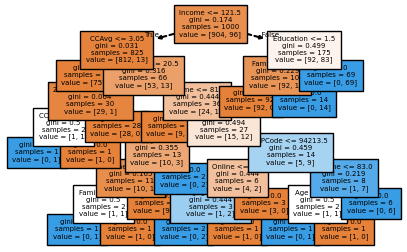

|--- Income <= 121.50
|   |--- CCAvg <= 3.05
|   |   |--- weights: [759.00, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- Experience <= 20.50
|   |   |   |--- ZIPCode <= 90056.50
|   |   |   |   |--- CCAvg <= 4.30
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- CCAvg >  4.30
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- ZIPCode >  90056.50
|   |   |   |   |--- weights: [28.00, 0.00] class: 0
|   |   |--- Experience >  20.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |--- Income >  81.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- Income <= 88.00
|   |   |   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Income >

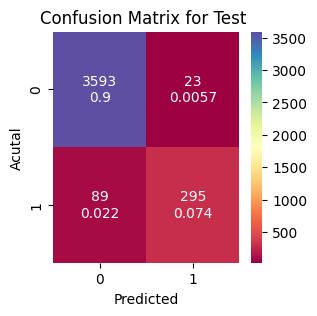

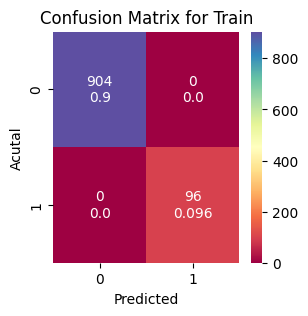

(       Algorithm  Package Type   Sample Type  Accuracy    Recall  Precision  \
 0  Complete Tree  Scikit learn  Test_dataset     0.972  0.768229   0.927673   
 
    F1-Score  
 0  0.840456  ,
        Algorithm  Package Type    Sample Type  Accuracy  Recall  Precision  \
 0  Complete Tree  Scikit learn  Train_dataset       1.0     1.0        1.0   
 
    F1-Score  
 0       1.0  )

In [17]:
'''
INVOKIN THE CLASS FOR SCIKIT LEARN DECISION TREE
COMPLETE TREE MODEL
AND
METRICS CALCULATION
'''

Objsklearn = SclitLearn_DecisionTree_Model(df_LoanModelling)
Objsklearn.Split_Train_Test()
def_Tree_Model = Objsklearn.Default_Tree_Model()
Objsklearn.Print_The_Tree(def_Tree_Model)
def_Test_Metrics,def_Train_Metrics = Objsklearn.Metrics_Calculation(def_Tree_Model,"Complete Tree",'Scikit learn')
def_Test_Metrics,def_Train_Metrics

Tree GridSearchCV
Best Estimator: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)
Best Parameter: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best Score: 0.9879999999999999


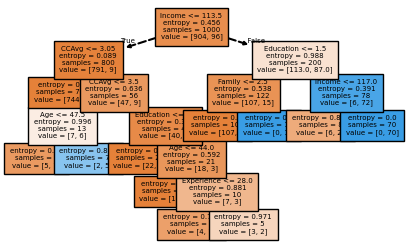

|--- Income <= 113.50
|   |--- CCAvg <= 3.05
|   |   |--- weights: [744.00, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- CCAvg <= 3.50
|   |   |   |--- Age <= 47.50
|   |   |   |   |--- weights: [5.00, 1.00] class: 0
|   |   |   |--- Age >  47.50
|   |   |   |   |--- weights: [2.00, 5.00] class: 1
|   |   |--- CCAvg >  3.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- Age <= 44.00
|   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |--- Age >  44.00
|   |   |   |   |   |--- Experience <= 28.00
|   |   |   |   |   |   |--- weights: [4.00, 1.00] class: 0
|   |   |   |   |   |--- Experience >  28.00
|   |   |   |   |   |   |--- weights: [3.00, 2.00] class: 0
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [107.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 15.00] class: 1
|   |-

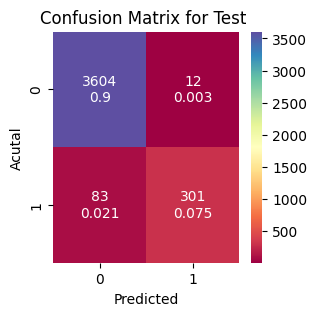

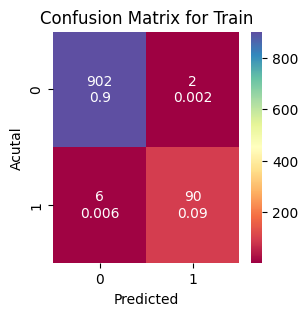

(                 Algorithm  Package Type   Sample Type  Accuracy    Recall  \
 0  Pre pruning Grid Search  Scikit Learn  Test_dataset   0.97625  0.783854   
 
    Precision  F1-Score  
 0   0.961661  0.863702  ,
                  Algorithm  Package Type    Sample Type  Accuracy  Recall  \
 0  Pre pruning Grid Search  Scikit Learn  Train_dataset     0.992  0.9375   
 
    Precision  F1-Score  
 0   0.978261  0.957447  )

In [18]:
'''
PRE PRUNING
GRID SEARCH CV MODEL AND METRICS CALCULATON
'''

grid_search_model=Objsklearn.Tree_GridSearchCV()
print("Best Estimator:",grid_search_model.best_estimator_)
print("Best Parameter:",grid_search_model.best_params_)
print("Best Score:", grid_search_model.best_score_)
Objsklearn.Print_The_Tree(grid_search_model.best_estimator_)
grid_Test_Metrics,grid_Train_Metrics = Objsklearn.Metrics_Calculation(grid_search_model,"Pre pruning Grid Search",'Scikit Learn')
grid_Test_Metrics,grid_Train_Metrics



Tree Randomized Search CV


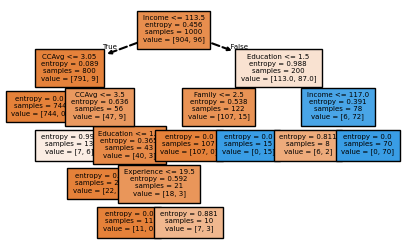

|--- Income <= 113.50
|   |--- CCAvg <= 3.05
|   |   |--- weights: [744.00, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- CCAvg <= 3.50
|   |   |   |--- weights: [7.00, 6.00] class: 0
|   |   |--- CCAvg >  3.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [22.00, 0.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- Experience <= 19.50
|   |   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |   |--- Experience >  19.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [107.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 15.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 117.00
|   |   |   |--- weights: [6.00, 2.00] class: 0
|   |   |--- Income >  117.00
|   |   |   |--- weights: [0.00, 70.00] class: 1

Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=50, max

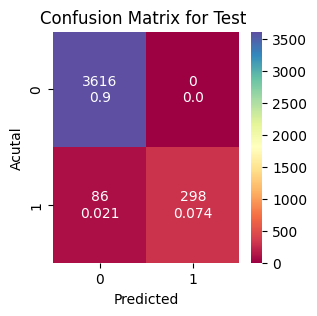

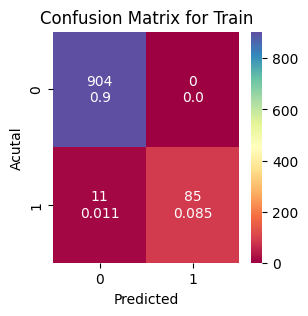

(                          Algorithm  Package Type   Sample Type  Accuracy  \
 0  Pre Pruning Randomized Search CV  Scikit learn  Test_dataset    0.9785   
 
      Recall  Precision  F1-Score  
 0  0.776042        1.0    0.8739  ,
                           Algorithm  Package Type    Sample Type  Accuracy  \
 0  Pre Pruning Randomized Search CV  Scikit learn  Train_dataset     0.989   
 
      Recall  Precision  F1-Score  
 0  0.885417        1.0  0.939227  )

In [19]:
'''
PRE PRUNING
RANDOMIZED SEARCH CV MODEL AND METRICS CALCULATON
'''

random_search_model=Objsklearn.Tree_RandomizedSearchCV()
Objsklearn.Print_The_Tree(random_search_model.best_estimator_)
print("Best Estimator:",random_search_model.best_estimator_)
print("Best Parameter:",random_search_model.best_params_)
print("Best Score:", random_search_model.best_score_)
rndm_Test_Metrics,rndm_Train_Metrics = Objsklearn.Metrics_Calculation(random_search_model,'Pre Pruning Randomized Search CV','Scikit learn')
rndm_Test_Metrics,rndm_Train_Metrics



Tree cost post pruning
ccp_alpha value for full trained tree:  [0.         0.000875   0.00090909 0.00096667 0.00133333 0.0020119
 0.00254329 0.00266667 0.00294545 0.00471152 0.02430189 0.06183791]
impurities value for full trained tree:  [0.         0.00175    0.00356818 0.00550152 0.00816818 0.01018009
 0.01526667 0.01793333 0.02087879 0.0255903  0.04989219 0.173568  ]


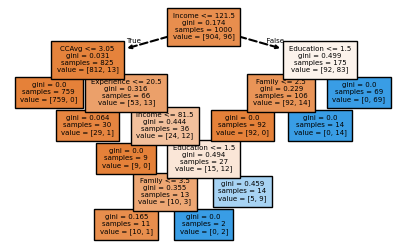

|--- Income <= 121.50
|   |--- CCAvg <= 3.05
|   |   |--- weights: [759.00, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- Experience <= 20.50
|   |   |   |--- weights: [29.00, 1.00] class: 0
|   |   |--- Experience >  20.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |--- Income >  81.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- weights: [10.00, 1.00] class: 0
|   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [5.00, 9.00] class: 1
|--- Income >  121.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [92.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 14.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 69.00] class: 1

Important Feature [0.         0.01802737 0

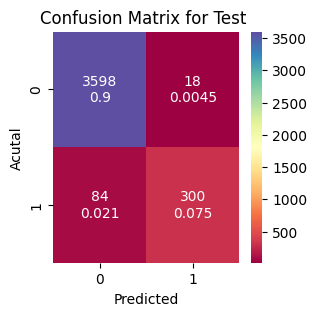

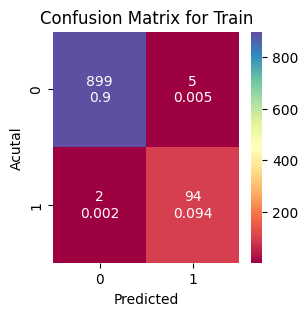

(      Algorithm  Package Type   Sample Type  Accuracy   Recall  Precision  \
 0  Post Pruning  Scikit learn  Test_dataset    0.9745  0.78125   0.943396   
 
    F1-Score  
 0  0.854701  ,
       Algorithm  Package Type    Sample Type  Accuracy    Recall  Precision  \
 0  Post Pruning  Scikit learn  Train_dataset     0.993  0.979167   0.949495   
 
    F1-Score  
 0  0.964103  )

In [20]:
'''
POST PRUNING THE TREE AND METRICS CALCULATION
'''

post_prune_tree = Objsklearn.Tree_Post_Pruning()
Objsklearn.Print_The_Tree(post_prune_tree)
print('Important Feature',post_prune_tree.feature_importances_)

pstprun_Test_Metrics, pstprun_Train_Metrics = Objsklearn.Metrics_Calculation(post_prune_tree,'Post Pruning','Scikit learn')
pstprun_Test_Metrics, pstprun_Train_Metrics


In [21]:
'''
METRICS MERGE SKLEARN DECISION TREE
'''

Sk_decisionTree_Test_Metrics = pd.concat([def_Test_Metrics, grid_Test_Metrics, rndm_Test_Metrics, pstprun_Test_Metrics],axis=0)
Sk_decisionTree_Train_Metrics = pd.concat([def_Train_Metrics, grid_Train_Metrics, rndm_Train_Metrics, pstprun_Train_Metrics],axis=0)

# Overall_Test_Metrics.columns=['Default Tree','Grid Search CV','Randomized Search CV','Post Pruning']
# Overall_Train_Metrics.columns=['Default Tree','Grid Search CV','Randomized Search CV','Post Pruning']
Sk_decisionTree_Test_Metrics

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Complete Tree,Scikit learn,Test_dataset,0.97200,0.768229,0.927673,0.840456
0,Pre pruning Grid Search,Scikit Learn,Test_dataset,0.97625,0.783854,0.961661,0.863702
0,Pre Pruning Randomized Search CV,Scikit learn,Test_dataset,0.97850,0.776042,1.000000,0.873900
0,Post Pruning,Scikit learn,Test_dataset,0.97450,0.781250,0.943396,0.854701


In [22]:
Sk_decisionTree_Train_Metrics

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Complete Tree,Scikit learn,Train_dataset,1.000,1.000000,1.000000,1.000000
0,Pre pruning Grid Search,Scikit Learn,Train_dataset,0.992,0.937500,0.978261,0.957447
0,Pre Pruning Randomized Search CV,Scikit learn,Train_dataset,0.989,0.885417,1.000000,0.939227
0,Post Pruning,Scikit learn,Train_dataset,0.993,0.979167,0.949495,0.964103


## TENSORFLOW DECISION TREE - FINAL

----------------------------------------------------------------------------------------------------
Feature Dataset Distribution
Rows:  5000 columns:  12
Target Dataset Distribution
Rows:  5000
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Feature Test data count:  1000 rows and  12 columns
Feature Train data count:  4000 rows and  12 columns
Target Test data count:  1000 rows
Target Train data count:  4000 rows
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Attribute Test Scaler shape:  (1000, 12)
Attribute Train Scaler shape:  (4000, 12)
----------------------------------------------------------------------------------------------------
-----------------------------------------

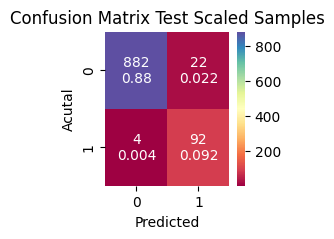

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00       384

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



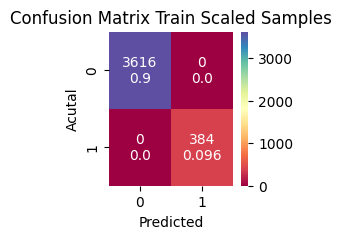

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       904
           1       0.77      0.99      0.87        96

    accuracy                           0.97      1000
   macro avg       0.89      0.98      0.93      1000
weighted avg       0.98      0.97      0.97      1000



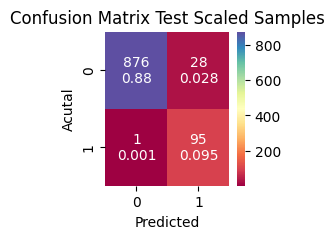

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3616
           1       0.79      0.95      0.87       384

    accuracy                           0.97      4000
   macro avg       0.89      0.96      0.92      4000
weighted avg       0.98      0.97      0.97      4000



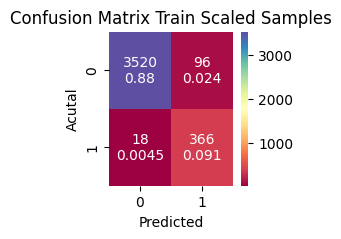

[0.00000000e+00 9.21488499e-05 1.18520860e-04 1.22910521e-04
 1.29056047e-04 1.29632190e-04 1.31989139e-04 1.33865589e-04
 1.34817478e-04 1.35508850e-04 1.37246274e-04 1.37286662e-04
 1.37380321e-04 1.38121528e-04 1.39885689e-04 1.84365782e-04
 1.84365782e-04 1.84365782e-04 2.07411504e-04 2.07411504e-04
 2.07411504e-04 2.10703751e-04 2.21238938e-04 2.24015235e-04
 2.41023645e-04 2.41980088e-04 2.43027621e-04 2.45821042e-04
 2.50401134e-04 2.60389554e-04 2.68651226e-04 2.70095870e-04
 2.96302149e-04 3.04203540e-04 3.12171399e-04 3.45685841e-04
 3.53367748e-04 3.68731563e-04 3.90078584e-04 4.56419049e-04
 4.68005446e-04 4.91792618e-04 4.97787611e-04 4.97787611e-04
 5.36263965e-04 5.53097345e-04 5.53426570e-04 5.85681779e-04
 6.00434505e-04 8.23780722e-04 9.53616112e-04 9.57745220e-04
 1.09360339e-03 1.11914346e-03 1.25122628e-03 1.26420467e-03
 1.94481956e-03 2.28970557e-03 2.38233518e-03 2.40415591e-03
 8.23592004e-03 1.31326323e-02 5.04810053e-02 6.89054011e-02
 3.09804546e-01]
-------

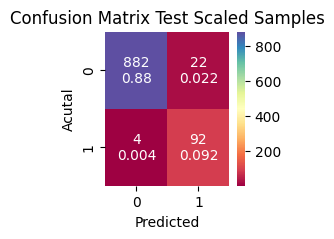

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       0.98      0.99      0.99       384

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000



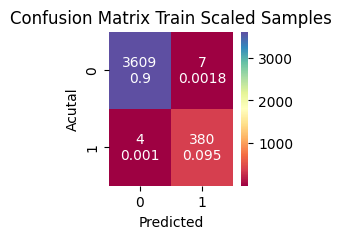

In [23]:
'''
TENSORFLOW DECISION TREE MODEL EXECUTION

Program description:
  1. Split the dataset into train and test
  2. scalar transformation to flatten the dataset
  3. SMOTE resampling to balance the dataset
  4. Complete run Decision tree classifier
  5. compute the metrics(proablity basis) to get the good coverage
  6. Pre Prun the model by hyper tuning parameters
  7. compute the metrics(proablity basis) to get the good coverage
  8. Post pruning finding best score ccp_alpha value and fit the model
  9. compute the metrics(proablity basis) to get the good coverage


'''


class Tesnorflow_DecisionTree(DatSetSplit_And_MetricsCalculation):
  def __init__(self,df):
    DatSetSplit_And_MetricsCalculation.__init__(self,df)

  def TensorFlow_DecisionTreeModel(self):
    Feature_Train,Feature_Test,Target_Train,Target_Test = self.Split_Train_Test() # SPLIT THE DATASET
    Feature_Train_Scaled, Feature_Test_Scaled = self.Scaler_Transform(Feature_Train,Feature_Test) # SCALAR TRANSFORMATION
    Feature_Train_resample, Target_Train_resample =self.SMOTE_Resample(Feature_Train_Scaled,Target_Train) # DATASET BALANCE USING SMOTE RESAMPLE

    ## COMPLETE TREE
    model_decision_Tree = DecisionTreeClassifier(random_state = 42)
    model_decision_Tree.fit(Feature_Train_resample,Target_Train_resample)

    #TEST DATASET PREDICTION AND METRICS
    comTree_Pred_Prob_Test = model_decision_Tree.predict_proba(Feature_Test_Scaled)[:,1]
    compTree_Pred_Test_Scaled = (comTree_Pred_Prob_Test >0.5).astype(int)

    #TRAIN DATASET PREDICTION AND METRICS
    comTree_Pred_Prob_Train = model_decision_Tree.predict_proba(Feature_Train_Scaled)[:,1]
    compTree_Pred_Train_Scaled = (comTree_Pred_Prob_Train >0.5).astype(int)


    df_Test_Metrics_CompTree = self.Calculating_Metrics(Target_Test,compTree_Pred_Test_Scaled,'Test Scaled Samples','Decision Tree','Tensorflow')
    df_Train_Metric_compTree = self.Calculating_Metrics(Target_Train,compTree_Pred_Train_Scaled,'Train Scaled Samples','Decision Tree','Tensorflow')



    # PRE PRUNING
    pre_prune_model = DecisionTreeClassifier(random_state = 42, max_depth = 4, min_samples_split=5, min_samples_leaf=3,criterion='gini')
    pre_prune_model.fit(Feature_Train_resample,Target_Train_resample)

    # TEST AND TRAIN DATASET PREDICTION RUN AND METRICS CALCULATION
    pre_prune_Pred_Prob_Test = pre_prune_model.predict_proba(Feature_Test_Scaled)[:,1]
    pre_prune_Pred_Test_Scaled = (pre_prune_Pred_Prob_Test >0.5).astype(int)
    pre_prune_Pred_Prob_Train = pre_prune_model.predict_proba(Feature_Train_Scaled)[:,1]
    pre_prune_Pred_Train_Scaled = (pre_prune_Pred_Prob_Train >0.5).astype(int)

    df_Test_Metrics_PrePrune = self.Calculating_Metrics(Target_Test,pre_prune_Pred_Test_Scaled,'Test Scaled Samples','Pre Prune Decision Tree','Tensorflow')
    df_Train_Metric_PrePrune = self.Calculating_Metrics(Target_Train,pre_prune_Pred_Train_Scaled,'Train Scaled Samples','Pre Prune Decision Tree','Tensorflow')


    # POST PRUNE
    post_prune_model = DecisionTreeClassifier(random_state = 42) # COMPLETE TREE RUN
    #CALCULATE THE COST COMPLEXITY
    cost_complexity_pruning = post_prune_model.cost_complexity_pruning_path(Feature_Train_resample,Target_Train_resample)
    ccp_alpha = cost_complexity_pruning.ccp_alphas #GET THE LIST OF CCP_APLPHAS VALUES
    print(ccp_alpha)
    post_prune_model_alpha = []
    #RUN THE MODEL TO GET THE BEST CCP_ALPHAS VALUE
    for ccp in ccp_alpha:
      alpha_model = DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp)
      alpha_score = cross_val_score(alpha_model,Feature_Train_resample,Target_Train_resample,cv=5)
      post_prune_model_alpha.append(alpha_score.mean())

    # TO GET THE BEST ALPHA VALUE
    best_alpha = ccp_alpha[np.argmax(post_prune_model_alpha)]
    post_prune_model = DecisionTreeClassifier(random_state = 42, ccp_alpha=best_alpha)
    post_prune_model.fit(Feature_Train_resample,Target_Train_resample)

    # TEST AND TRAIN DATASET PREDICTION RUN AND METRICS CALCULATION
    post_prune_Pred_Prob_Test = post_prune_model.predict_proba(Feature_Test_Scaled)[:,1]
    post_prune_Pred_Test_Scaled = (post_prune_Pred_Prob_Test >0.5).astype(int)
    post_prune_Pred_Prob_Train = post_prune_model.predict_proba(Feature_Train_Scaled)[:,1]
    post_prune_Pred_Train_Scaled = (post_prune_Pred_Prob_Train >0.5).astype(int)
    df_Test_Metrics_PostPrune = self.Calculating_Metrics(Target_Test,post_prune_Pred_Test_Scaled,'Test Scaled Samples','Post Prune Decision Tree','Tensorflow')
    df_Train_Metrics_PostPrune = self.Calculating_Metrics(Target_Train,post_prune_Pred_Train_Scaled,'Train Scaled Samples','Post Prune Decision Tree','Tensorflow')



    df_Test_Metrics = pd.concat([df_Test_Metrics_CompTree,df_Test_Metrics_PrePrune,df_Test_Metrics_PostPrune],axis=0)
    df_Train_Metrics = pd.concat([df_Train_Metric_compTree,df_Train_Metric_PrePrune,df_Train_Metrics_PostPrune],axis=0)

    df_Test_Metrics.columns=['Algorithm','Package Type','Sample Type','Accuracy','Recall','Precision','F1-Score']
    df_Train_Metrics.columns=['Algorithm','Package Type','Sample Type','Accuracy','Recall','Precision','F1-Score']


    return df_Test_Metrics,df_Train_Metrics






Tf_DecisionTree = Tesnorflow_DecisionTree(df_LoanModelling)
Test_Metrics_dTree,Train_Metrics_dTree = Tf_DecisionTree.TensorFlow_DecisionTreeModel()

In [24]:
Test_Metrics_dTree

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Decision Tree,Tensorflow,Test Scaled Samples,0.974,0.807018,0.958333,0.87619
0,Pre Prune Decision Tree,Tensorflow,Test Scaled Samples,0.971,0.772358,0.989583,0.86758
0,Post Prune Decision Tree,Tensorflow,Test Scaled Samples,0.974,0.807018,0.958333,0.87619


In [25]:
Train_Metrics_dTree

,Algorithm,Package Type,Sample Type,Accuracy,Recall,Precision,F1-Score
0,Decision Tree,Tensorflow,Train Scaled Samples,1.00000,1.000000,1.000000,1.000000
0,Pre Prune Decision Tree,Tensorflow,Train Scaled Samples,0.97150,0.792208,0.953125,0.865248
0,Post Prune Decision Tree,Tensorflow,Train Scaled Samples,0.99725,0.981912,0.989583,0.985733


## LOGISTIC STATS MODEL- FINAL

----------------------------------------------------------------------------------------------------
Feature Dataset Distribution
Rows:  5000 columns:  12
Target Dataset Distribution
Rows:  5000
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Feature Test data count:  1000 rows and  12 columns
Feature Train data count:  4000 rows and  12 columns
Target Test data count:  1000 rows
Target Train data count:  4000 rows
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Attribute Test Scaler shape:  (1000, 12)
Attribute Train Scaler shape:  (4000, 12)
----------------------------------------------------------------------------------------------------
-----------------------------------------

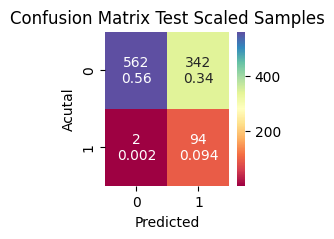

----------------------------------------------------------------------------------------------------
Calculating The Metrics
              precision    recall  f1-score   support

           0       1.00      0.63      0.77      3616
           1       0.22      0.99      0.36       384

    accuracy                           0.67      4000
   macro avg       0.61      0.81      0.57      4000
weighted avg       0.92      0.67      0.73      4000



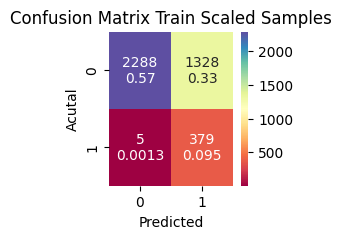

In [26]:
'''
STATS MODEL LOGISTIC REGRESSION
Program description:
  1. Split the dataset into train and test
  2. scalar transformation to flatten the dataset
  3. SMOTE resampling to balance the dataset
  4. Tensorflow model for logistic regression
  5. Compute the Metrics
  6. find VIF(high multicolinearity) feature which might impact the perfromance VIF>10 high impact VIF >5 moderate impact
  7.drop high VIF feature
  8. rerun the model
  9. compute the metrics(proablity basis) to get the good coverage
'''


class StatsModel_Logistic(DatSetSplit_And_MetricsCalculation):
  def __init__(self,df):
    DatSetSplit_And_MetricsCalculation.__init__(self,df)

  def Stat_Model_Creation(self):


    Feature_Train,Feature_Test,Target_Train,Target_Test = self.Split_Train_Test() #DATASET SPLIT

    Feature_Train_Scaled, Feature_Test_Scaled = self.Scaler_Transform(Feature_Train,Feature_Test) # DATASET SCALAR TRANSFORMATION
    df_Feature_Train_Scaled = pd.DataFrame(Feature_Train_Scaled,columns=Feature_Train.columns)
    df_Feature_Test_Scaled = pd.DataFrame(Feature_Test_Scaled,columns=Feature_Test.columns)

    Feature_Train_resample, Target_Train_resample =self.SMOTE_Resample(df_Feature_Train_Scaled,Target_Train) # SMOTE RESAMPLING TO BALANCE THE FEATURE AND TARGET

    # without finetuning
    model_logistic_notuning = sm.Logit(Target_Train_resample,Feature_Train_resample) #COMPLETE TREE FIT RUN
    stat_logistic_model_notune = model_logistic_notuning.fit()
    print(stat_logistic_model_notune.summary())

    # Variable Influence Factor Calculation
    # TO CALCULATE THE VARIABLE INFLUENCE FACTOR WHICH CAUSING MULTICOLINEARITY
    Feature_Train_resample = sm.add_constant(Feature_Train_resample)
    VIF_df = pd.DataFrame()
    VIF_df['Features'] = Feature_Train_resample.columns
    VIF_df['VIF'] = [variance_inflation_factor(Feature_Train_resample.values,i) for i in range(Feature_Train_resample.shape[1])]
    print(VIF_df)

    # REMOVING THE COLUMNS WHICH CAUSING HIGH VIF
    Feature_Train_resample = Feature_Train_resample.drop(['const'],axis=1)
    model_vif = sm.Logit(Target_Train_resample,Feature_Train_resample)
    stat_logistic_model_vif = model_vif.fit()
    print(stat_logistic_model_vif.summary())

    df_Feature_Test_Scaled = sm.add_constant(df_Feature_Test_Scaled)
    df_Feature_Test_Scaled = df_Feature_Test_Scaled.drop(['const'],axis=1)

    # REFIT AND MODEL RERUN
    Test_Prediction_prob = stat_logistic_model_vif.predict(df_Feature_Test_Scaled)
    Test_Prediction = (Test_Prediction_prob >0.5).astype(int)
    df_Test_Metrics = self.Calculating_Metrics(Target_Test,Test_Prediction,'Test Scaled Samples','Logistics','Statsmodel')

    # METRICS CALCULATION
    Train_Prediction_prob = stat_logistic_model_vif.predict(df_Feature_Train_Scaled)
    Train_Prediction = (Train_Prediction_prob >0.5).astype(int)
    df_Train_Metrics = self.Calculating_Metrics(Target_Train,Train_Prediction,'Train Scaled Samples','Logistics','Statsmodel')

    return df_Train_Metrics, df_Test_Metrics

# INVOKE THE CLASS OBJECT
statObject = StatsModel_Logistic(df_LoanModelling)
stat_Train_Metric, stat_Test_Metric = statObject.Stat_Model_Creation()


In [27]:
stat_Train_Metric

,Algorithm,Package Type,Sample Type,Accuracy,Precision,Recall,F1-Score
0,Logistics,Statsmodel,Train Scaled Samples,0.66675,0.222027,0.986979,0.362506


In [28]:
stat_Test_Metric

,Algorithm,Package Type,Sample Type,Accuracy,Precision,Recall,F1-Score
0,Logistics,Statsmodel,Test Scaled Samples,0.656,0.215596,0.979167,0.353383


## LOGISTIC TENSORFLOW FINAL


In [33]:
'''
Tensorflow Logistic Regression
Program description:
  1. Split the dataset into train and test
  2. scalar transformation to flatten the dataset
  3. SMOTE resampling to balance the dataset
  4. Tensorflow model for logistic regression
  5. Compute the Metrics
  6. find VIF(high multicolinearity) feature which might impact the perfromance VIF>10 high impact VIF >5 moderate impact
  7.drop high VIF feature
  8. rerun the model
  9. compute the metrics(proablity basis) to get the good coverage
'''

class Tesnorflow_Logistic(DatSetSplit_And_MetricsCalculation):
  def __init__(self,df):
    DatSetSplit_And_MetricsCalculation.__init__(self,df)

  def TensorFlow_Model_Creation(self):
    # Spli the dataset, scale and resample the dataset
    Feature_Train,Feature_Test,Target_Train,Target_Test = self.Split_Train_Test() # Split the dataset
    Feature_Train_Scaled, Feature_Test_Scaled = self.Scaler_Transform(Feature_Train,Feature_Test) # Scalar transformation
    Feature_Train_resample, Target_Train_resample =self.SMOTE_Resample(Feature_Train_Scaled,Target_Train) # resample for split balance

    tf_model = tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(Feature_Train_resample.shape[1],))]) # Define the model
    tf_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics =['accuracy','precision','recall']) # Optimizer and metrics define

    keras_model = KerasClassifier(model = tf_model,epochs=3,batch_size=5,validation_split =0.2) # Keras classifier declaration

    model_calibrated = CalibratedClassifierCV(estimator=keras_model,method='sigmoid') # CAlibration
    model_calibrated.fit(Feature_Train_resample,Target_Train_resample) # model fit

    # Test Prediction
    Target_Predict_prob_scaled = model_calibrated.predict_proba(Feature_Test_Scaled)[:,1]
    Target_Predict_scaled = (Target_Predict_prob_scaled >0.5).astype(int)

    #Train Prediction
    Target_Predict_prob = model_calibrated.predict_proba(Feature_Train_Scaled)[:,1]
    Target_Predict_Tarin_Scaled = (Target_Predict_prob >0.5).astype(int)

    # Metrics storing
    df_TestScaled_Metrics = self.Calculating_Metrics(Target_Test,Target_Predict_scaled,'Test Scaled Samples','Logistics','Tensorflow')
    df_TrainScaled_Metrics = self.Calculating_Metrics(Target_Train,Target_Predict_Tarin_Scaled,'TRain Scaled Samples','Logistics','Tensorflow')



    return df_TestScaled_Metrics,df_TrainScaled_Metrics


tfobj=Tesnorflow_Logistic(df_LoanModelling)
tf_met_Test_Scaled, tf_met_Train_Scaled = tfobj.TensorFlow_Model_Creation()



----------------------------------------------------------------------------------------------------
Feature Dataset Distribution
Rows:  5000 columns:  12
Target Dataset Distribution
Rows:  5000
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Feature Test data count:  1000 rows and  12 columns
Feature Train data count:  4000 rows and  12 columns
Target Test data count:  1000 rows
Target Train data count:  4000 rows
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Attribute Test Scaler shape:  (1000, 12)
Attribute Train Scaler shape:  (4000, 12)
----------------------------------------------------------------------------------------------------
-----------------------------------------

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
tf_met_Test_Scaled

In [ ]:
tf_met_Train_Scaled

## CLUSTERING ALGORITHM TENSORFLOW

In [31]:
class Tesnorflow_Clustering(DatSetSplit_And_MetricsCalculation):
  def __init__(self,df):
    DatSetSplit_And_MetricsCalculation.__init__(self,df)

  def TensorFlow_Model_Creation(self):
    # Spli the dataset, scale and resample the dataset
    self.Feature_Train,self.Feature_Test,self.Target_Train,self.Target_Test = self.Split_Train_Test() # Split the dataset
    self.Feature_Train_Scaled, self.Feature_Test_Scaled = self.Scaler_Transform(self.Feature_Train,self.Feature_Test) # Scalar transformation
    self.Feature_Train_resample, self.Target_Train_resample =self.SMOTE_Resample(self.Feature_Train_Scaled,self.Target_Train) # resample for split balance

  def Create_model(self):
    tf_model = tf.keras.Sequential()
    tf_model.add(tf.keras.layers.Dense(units = 32, input_shape=[self.Feature_Train_resample.shape[1],],activation ='relu'))
    tf_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    tf_model.compile(optimizer = 'adam', loss ='binary_crossentropy',metrics =['accuracy','precision','recall'])
    return tf_model

  def HyperParameterTuning(self):
    #hypertune_algo = ['gridsearch','randomizedsearch','hyperband','bayesian']
    hypertune_algo = ['gridsearch','randomizedsearch']
    model_result = {}
    Stop_Early = EarlyStopping(monitor='loss',patience=3)
    param_value = {'batch_size':[5],'epochs':[5]}
    df_Metrics_Test =pd.DataFrame()
    df_Metrics_Train =pd.DataFrame()


    for algrthm in hypertune_algo:
      if algrthm == 'gridsearch':
        knn_model = KerasClassifier(model=self.Create_model(),verbose=0)
        #hyperGrid = GridSearchCV(estimator = knn_model, param_grid = param_gridsearch, cv = 5)
        hyperGrid = GridSearchCV(estimator = knn_model, param_grid = param_value, cv = 5,verbose =1, n_jobs=-1)
        hyperGrid.fit(self.Feature_Train_resample,self.Target_Train_resample,callbacks=[Stop_Early])
        best_model = hyperGrid.best_estimator_
        best_parameter = hyperGrid.best_params_
        best_score = hyperGrid.best_score_
        model_result[algrthm] = [best_model,best_parameter,best_score]

      elif algrthm == 'randomizedsearch':
        rdm_model = KerasClassifier(model = self.Create_model(),verbose = 0)
        hyperRandom = RandomizedSearchCV(estimator= rdm_model,param_distributions=param_value,n_iter=20,verbose=1,cv=5,n_jobs=-1)
        hyperRandom.fit(self.Feature_Train_resample,self.Target_Train_resample,callbacks=[Stop_Early])
        best_model = hyperRandom.best_estimator_
        best_parameter = hyperRandom.best_params_
        best_score = hyperRandom.best_score_
        model_result[algrthm] = [best_model,best_parameter,best_score]

        pass

      elif algrthm == 'hyperband':
        pass

      elif algrthm == 'bayesian':
        pass


      print(algrthm)
      print('Best Model:',best_model)
      print('Best Parameter:',best_parameter)
      print('Best Score:',best_score)
      print('-'*100)

      Target_prediction_Prob_Test = best_model.predict_proba(self.Feature_Test_Scaled)[:,1]
      Target_prediction_Test = (Target_prediction_Prob_Test>0.5).astype(int)

      Target_prediction_Prob_Train = best_model.predict_proba(self.Feature_Train_Scaled)[:,1]
      Target_prediction_Train = (Target_prediction_Prob_Train>0.5).astype(int)

      df_Metrics_Test = pd.concat([df_Metrics_Test,self.Calculating_Metrics(self.Target_Test,Target_prediction_Test,'Test Scaled Samples','Clustering-'+algrthm,'Tensorflow')],axis=0)
      df_Metrics_Train = pd.concat([df_Metrics_Train,self.Calculating_Metrics(self.Target_Train,Target_prediction_Train,'Train Scaled Samples','Clustering-'+algrthm,'Tensorflow')],axis=0)

    return df_Metrics_Test,df_Metrics_Train




tf_Cluster = Tesnorflow_Clustering(df_LoanModelling)
tf_Cluster.TensorFlow_Model_Creation()
dftfknn_Metrics_Test,dftfknn_Metrics_Train=tf_Cluster.HyperParameterTuning()

----------------------------------------------------------------------------------------------------
Feature Dataset Distribution
Rows:  5000 columns:  12
Target Dataset Distribution
Rows:  5000
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Feature Test data count:  1000 rows and  12 columns
Feature Train data count:  4000 rows and  12 columns
Target Test data count:  1000 rows
Target Train data count:  4000 rows
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Attribute Test Scaler shape:  (1000, 12)
Attribute Train Scaler shape:  (4000, 12)
----------------------------------------------------------------------------------------------------
-----------------------------------------

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
dftfknn_Metrics_Test

In [ ]:
dftfknn_Metrics_Train

## OVERALL SUMMARY

In [34]:
overall_Train_Metrics = pd.concat([Sk_decisionTree_Train_Metrics,stat_Train_Metric,tf_met_Train_Scaled,Train_Metrics_dTree],axis=0)
overall_Train_Metrics.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)

NameError: name 'tf_met_Train_Scaled' is not defined

In [ ]:
overall_Test_Metrcis = pd.concat([Sk_decisionTree_Test_Metrics,stat_Test_Metric,tf_met_Test_Scaled,Test_Metrics_dTree],axis=0)
overall_Test_Metrcis.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)

'''
Observations:

High Perfromance model
  1. Scikit learn Decision Tree Prepruned Grid and Randmoized search model which has the good metrics for the test data
  2. Tensorflow Decsion Tree also shown good metrics equlivant to the Scikit learn model

Low Performance Model:
  1. STATs Model Logistic regression shown the average perfromance even dropped VIF feature
'''
